In [53]:
# check version number
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import imblearn
import WineDataSet
from collections import Counter
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler

print(imblearn.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.10.1


In [54]:
w = WineDataSet.WineDataSet()

# getting dataset copy with only relevant parameters
X = w.get_ml_copy()
y = w.ds['quality_label']

In [55]:
counter = Counter(y)
print(counter)

Counter({'medium': 3915, 'low': 2384, 'high': 198})


In [56]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'low': 3915, 'medium': 3915, 'high': 3915})


<AxesSubplot: xlabel='alcohol', ylabel='quality_label'>

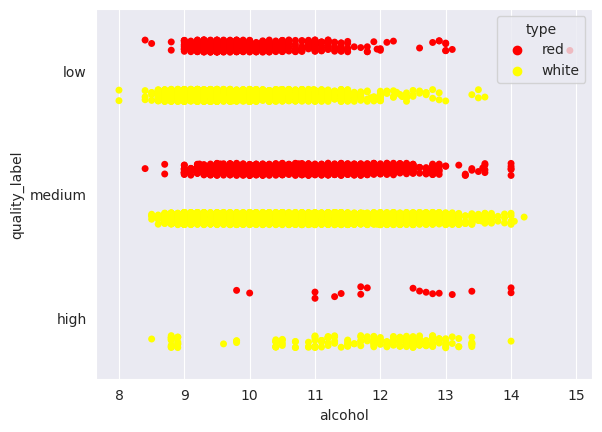

In [57]:
sns.stripplot(
    x=X['alcohol'], y=y, data=w.ds,
    hue='type',
    jitter=True,
    dodge=True,
    palette=w.col_arr
)

<AxesSubplot: xlabel='alcohol', ylabel='quality_label'>

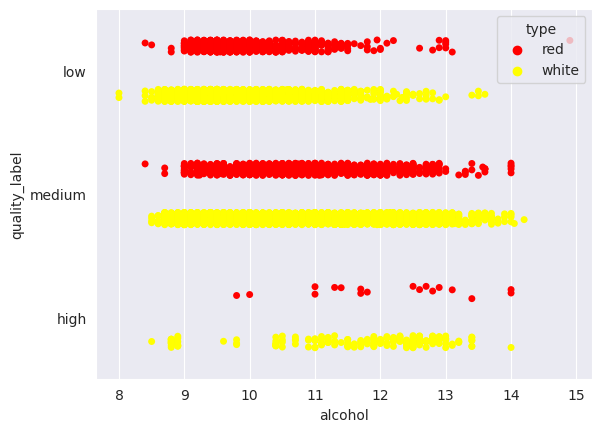

In [58]:
sns.stripplot(
    x=X_res['alcohol'], y=y_res, data=w.ds,
    hue='type',
    jitter=True,
    dodge=True,
    palette=w.col_arr
)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=4)

model = LogisticRegression()                    # 2. instantiate model
model.fit(X_train, y_train)                     # 3. fit model to data
y_model = model.predict(X_test)                 # 4. predict on new data

print("==================== RAW DATA ======================")
print(classification_report(y_test, y_model))
print("Cohen-Kappa score:", cohen_kappa_score(y_test, y_model))

==================== RAW DATA ======================
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        42
         low       0.59      0.48      0.53       487
      medium       0.67      0.79      0.73       771

    accuracy                           0.65      1300
   macro avg       0.42      0.42      0.42      1300
weighted avg       0.62      0.65      0.63      1300

Cohen-Kappa score: 0.25537396385174516


/home/user/anaconda3/envs/env310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/user/anaconda3/envs/env310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/env310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.8, random_state=4)

model = LogisticRegression()                    # 2. instantiate model
model.fit(X_train, y_train)                     # 3. fit model to data
y_model = model.predict(X_test)                 # 4. predict on new data

print("==================== SMOTED DATA ======================")
print(classification_report(y_test, y_model))
print("Cohen-Kappa score:", cohen_kappa_score(y_test, y_model))

/home/user/anaconda3/envs/env310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


==================== SMOTED DATA ======================
              precision    recall  f1-score   support

        high       0.63      0.69      0.66       772
         low       0.57      0.78      0.66       775
      medium       0.47      0.25      0.33       802

    accuracy                           0.57      2349
   macro avg       0.56      0.58      0.55      2349
weighted avg       0.55      0.57      0.55      2349

Cohen-Kappa score: 0.35928622498489104


In [61]:


norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
# transform testing dataabs
X_test_norm = norm.transform(X_test)

model = LogisticRegression()                    # 2. instantiate model
model.fit(X_train_norm, y_train)                     # 3. fit model to data
y_model = model.predict(X_test_norm)                 # 4. predict on new data

print("==================== SMOTED and SCALED DATA ======================")
print(classification_report(y_test, y_model))
print("Cohen-Kappa score:", cohen_kappa_score(y_test, y_model))

==================== SMOTED and SCALED DATA ======================
              precision    recall  f1-score   support

        high       0.66      0.73      0.69       772
         low       0.60      0.77      0.67       775
      medium       0.49      0.30      0.37       802

    accuracy                           0.60      2349
   macro avg       0.58      0.60      0.58      2349
weighted avg       0.58      0.60      0.58      2349

Cohen-Kappa score: 0.39718448782679183
